# LINEAR REGRESSION

In [1]:
# Install the dependencies that we would need throught this notebook

! pip install pyforest # This single dependency will load all libraries that you will need for data science
from pyforest import *
lazy_imports()

['import spacy',
 'import pydot',
 'import plotly.express as px',
 'import tqdm',
 'import altair as alt',
 'import dash',
 'import seaborn as sns',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly.graph_objs as go',
 'import glob',
 'import gensim',
 'from sklearn import svm',
 'import nltk',
 'import awswrangler as wr',
 'import datetime as dt',
 'import keras',
 'from sklearn.preprocessing import OneHotEncoder',
 'import pandas as pd',
 'import os',
 'from pathlib import Path',
 'from sklearn.manifold import TSNE',
 'import sys',
 'import statistics',
 'from dask import dataframe as dd',
 'import re',
 'from sklearn.ensemble import RandomForestClassifier',
 'import xgboost as xgb',
 'import pickle',
 'import matplotlib.pyplot as plt',
 'from pyspark import SparkContext',
 'import lightgbm as lgb',
 'import matplotlib as mpl',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import tens

In [2]:
# Let's read the data in a pandas dataframe
Data = pd.read_csv('data/auto-mpg.csv')

<IPython.core.display.Javascript object>

In [4]:
# Let's see what our data has
Data.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
# Find how many rows and columns are there in data
Data.shape

(392, 9)

<IPython.core.display.Javascript object>

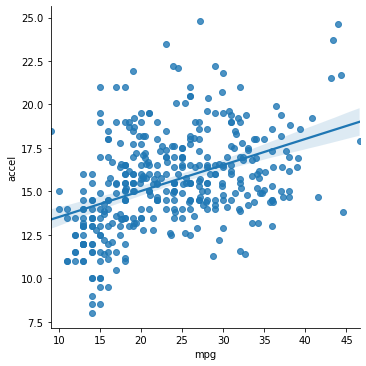

In [6]:
sns.lmplot(x='mpg',y='accel',data=Data)

In [7]:
Data['mpg'].corr(Data['accel'])

0.4233285369027873

<IPython.core.display.Javascript object>

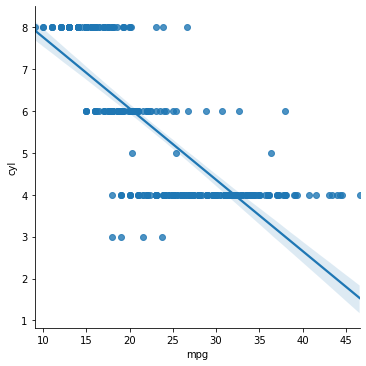

In [8]:
sns.lmplot(x='mpg',y='cyl',data=Data)

In [9]:
Data['mpg'].corr(Data['cyl'])

-0.7776175081260225

<IPython.core.display.Javascript object>

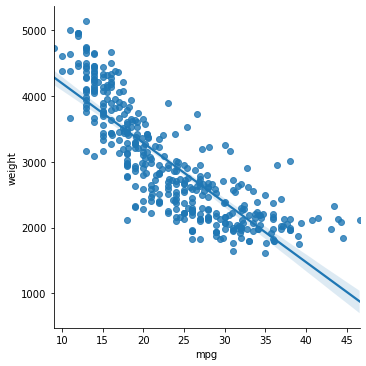

In [10]:
sns.lmplot(x='mpg',y='weight',data=Data)

In [11]:
Data['mpg'].corr(Data['weight'])

-0.8322442148315754

In [12]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displ,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
accel,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [13]:
df = Data.drop('name',axis=1)

In [14]:
df['origin'] = df['origin'].replace({1: 'america',2:'europe',3:'asia'})
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [15]:
df = pd.get_dummies(df,columns=['origin'])
df

<IPython.core.display.Javascript object>

,mpg,cyl,displ,hp,weight,accel,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [16]:
df.isna().sum()

mpg               0
cyl               0
displ             0
hp                0
weight            0
accel             0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [17]:
df.dtypes

mpg               float64
cyl                 int64
displ             float64
hp                  int64
weight              int64
accel             float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

<IPython.core.display.Javascript object>

/home/pankajwahane/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

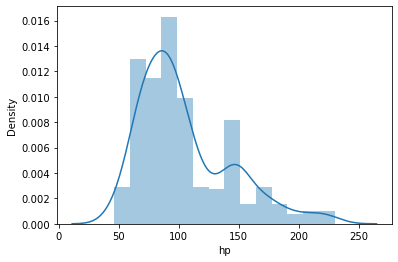

In [18]:
sns.distplot(df['hp'])

In [19]:
df = df.fillna(df.median())

<IPython.core.display.Javascript object>

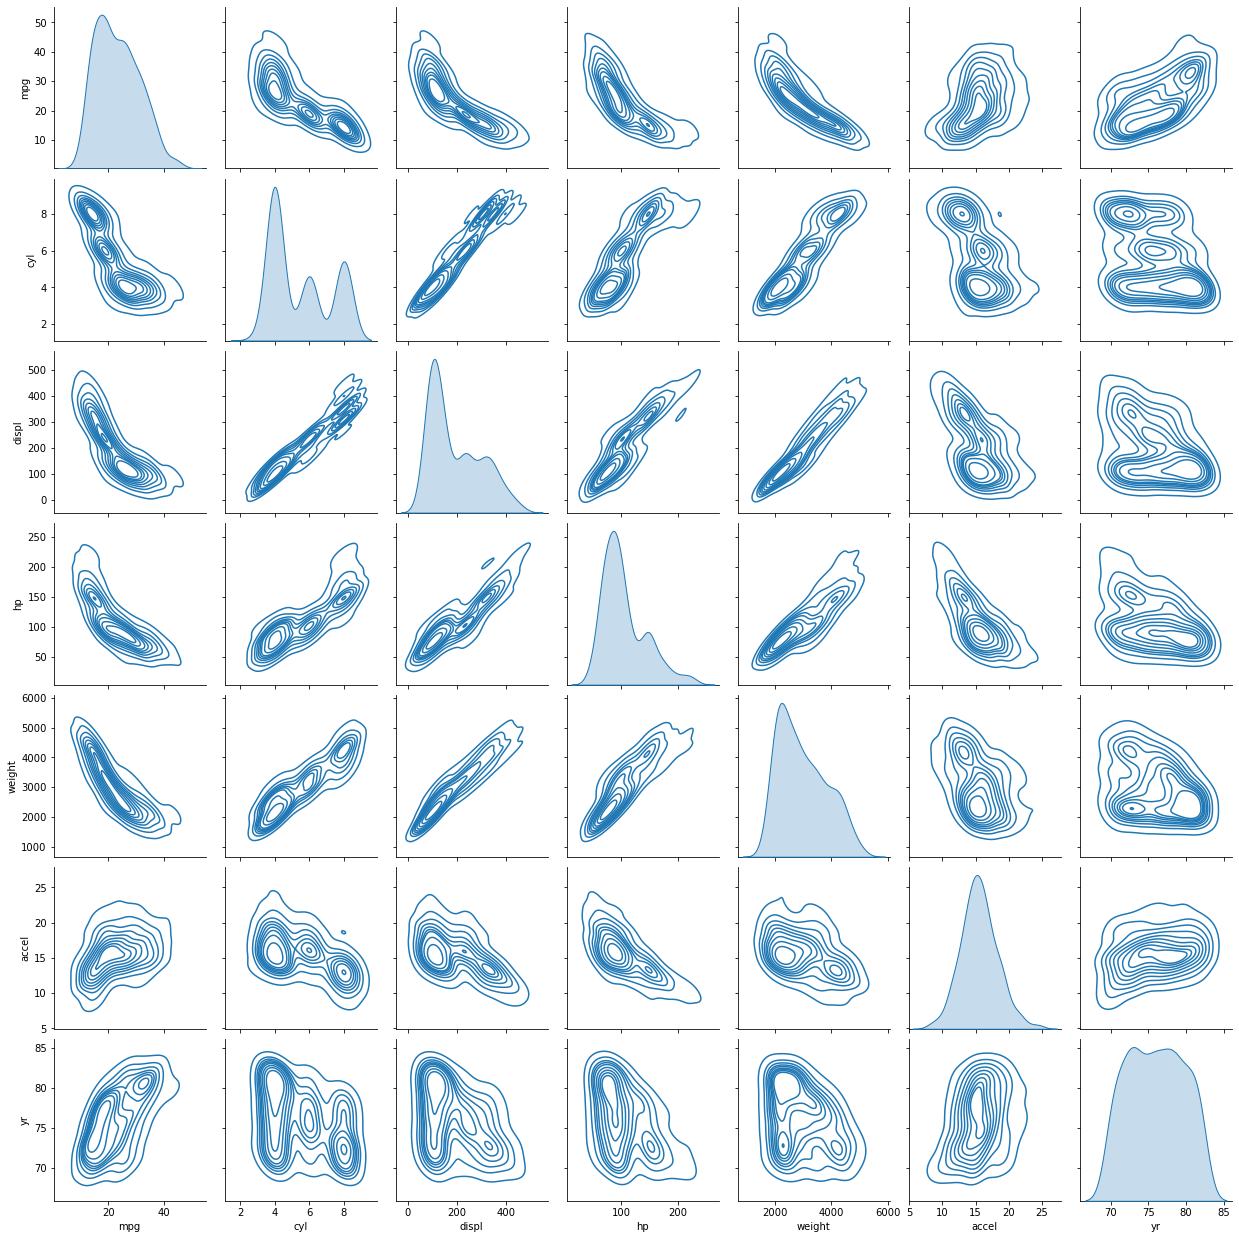

In [20]:
attr_select = df.iloc[:,0:7]
sns.pairplot(attr_select,kind='kde')

In [22]:
# Independant variable
X = df.drop(['mpg','origin_europe'],axis=1)
Y = df[['mpg']]

In [23]:
# Split X and Y into training and testing datasets - 70:30 split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

<IPython.core.display.Javascript object>

In [28]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression()

In [29]:
regression_model.coef_

array([[-2.32509254e-01,  2.45825956e-02, -1.48890324e-03,
        -7.61188242e-03,  2.80132661e-01,  7.74684971e-01,
        -2.59904083e+00,  1.21355105e-01]])

In [31]:
for indx, col_name in enumerate(X_train.columns):
    print("Coefficient of {} is {}".format(col_name,regression_model.coef_[0][indx]))

Coefficient of cyl is -0.23250925374176679
Coefficient of displ is 0.024582595649820762
Coefficient of hp is -0.0014889032367727368
Coefficient of weight is -0.007611882424290457
Coefficient of accel is 0.28013266086228367
Coefficient of yr is 0.7746849712944152
Coefficient of origin_america is -2.599040830425158
Coefficient of origin_asia is 0.12135510539386628


In [32]:
intercept = regression_model.intercept_[0]
print("Intercept of the model is {}".format(intercept))

Intercept of the model is -18.924995881633176


In [33]:
regression_model.score(X_train,Y_train)

0.8205337631867142

In [34]:
regression_model.score(X_test,Y_test)

0.8242172817490035

In [35]:
regression_model.predict(X_test)

array([[23.83567423],
       [28.59726492],
       [32.37736248],
       [22.01588437],
       [35.28019321],
       [28.14163774],
       [26.55945716],
       [12.57219984],
       [25.63744107],
       [32.0953011 ],
       [23.40186073],
       [32.21377673],
       [20.20455071],
       [31.80347979],
       [29.52579591],
       [14.74734514],
       [29.86523971],
       [33.12612966],
       [11.05583483],
       [23.03764967],
       [27.03713766],
       [17.98215689],
       [17.970493  ],
       [16.10744901],
       [10.85311295],
       [20.09330878],
       [31.84106862],
       [18.50652465],
       [21.76656008],
       [28.94836323],
       [21.95017154],
       [24.40318225],
       [10.27943191],
       [28.67974388],
       [20.91743998],
       [14.33883247],
       [17.08346441],
       [21.499123  ],
       [35.17239049],
       [24.59637251],
       [16.31300567],
       [11.94917488],
       [22.42178229],
       [22.36191917],
       [22.15963237],
       [18